# __CS 105 Final Project Phase 2__: Explanatory Data Analysis of Wildfires in the United States

### Why did you analyze the United States' Fire Data when you already have datasets pertaining to Australia and Brazil? 

Wildfires are occurring more frequently as the years progress. This is clearly a climate change issue. Australia and Brazil are two countries that in the recent years have been affected by the most wildfires in the global sphere. These occurrences have thus captured the attention of the global sphere.

As citizens of the U.S. because we are not living in these two countries, we may not be affected by this news. Essentially, we may turn a blind eye to this issue and simply shrug it off. But climate change is occurring at a truly alarming rate, as indicated by the increasing frequency of the United States' wildfire trends. 

As a result, by analyzing wildfires in the United States, we can see how the wildfire issue is affecting our home soil. This analysis thus seeks to shed light on this issue.   

### What is the dataset, __"1.88 Million U.S. Wildfires"__ about? 

Titled, "1.88 Million US Wildfires" this dataset is a spatial database of wildfires that occurred in the United States from 1992 to 2015. It is the third update of a publication originally generated to support the national Fire Program Analysis (FPA) system. The wildfire records were acquired from the reporting systems of federal, state, and local fire organizations. The following core data elements were required for records to be included in this data publication: discovery date, final fire size, and a point location at least as precise as Public Land Survey System (PLSS) section (1-square mile grid). The data were transformed to conform, when possible, to the data standards of the National Wildfire Coordinating Group (NWCG).

Here is the link to the Kaggle dataset: [1.88 Million U.S. Wildfires](https://www.kaggle.com/rtatman/188-million-us-wildfires)

Because this is a SQL dataset, let's import the libraries necessary to work with this data. First, we will install the packages necessary to work with this data. 

In [1]:
%pip install pandas

You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install sqlalchemy

You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Then, we will import the libraries for the cleaning and analysis procedures. 

In [3]:
# LIBRARIES 
import pandas as pd
import numpy as np
import sqlite3
from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt

In the following segments of code, we are cleaning the SQL database in order to create a latitude, longitude, fire year, and firesize column. 

In [4]:
# CREATING A CONNECTION FOR THE SQLITE FILE
conn = sqlite3.connect("FPA_FOD_20170508.sqlite")
df = pd.read_sql_query("SELECT LATITUDE, LONGITUDE, FIRE_YEAR, FIRE_SIZE FROM Fires;", conn)
print(df.head())

    LATITUDE   LONGITUDE  FIRE_YEAR  FIRE_SIZE
0  40.036944 -121.005833       2005       0.10
1  38.933056 -120.404444       2004       0.25
2  38.984167 -120.735556       2004       0.10
3  38.559167 -119.913333       2004       0.10
4  38.559167 -119.933056       2004       0.10


In [5]:
heat_df = df[["LATITUDE","LONGITUDE", "FIRE_YEAR", "FIRE_SIZE"]]

Here, we are cleaning the data by limiting the number of points.

Limiting the number of points allows us to get a processible result. 

In [6]:
heat_df = heat_df[heat_df["FIRE_SIZE"] > 1800] 
heat_df = heat_df.dropna(axis=0, subset=["LATITUDE","LONGITUDE"])

Here, we are listing the comprehensions to make a list of lists. 

In [7]:
heat_data = [[row["LATITUDE"],row["LONGITUDE"]] for index, row in heat_df.iterrows()]
del heat_df

#### __HISTOGRAM REPRESENTATIONS OF THE DATA__

#### __Which states are the most prone to fires?__ 

In [8]:
df = pd.read_sql_query("SELECT SUM(FIRE_SIZE) AS TOTAL_FIRE_SIZE, State FROM Fires GROUP BY State;", conn)
df = df.set_index("STATE")
df[:10]

,TOTAL_FIRE_SIZE
STATE,
AK,3.223309e+07
AL,9.205453e+05
AR,5.089118e+05
AZ,5.576681e+06
CA,1.274586e+07
CO,1.842309e+06
CT,1.124331e+04
DC,3.250000e+01
DE,4.833650e+03


As we can see here are the ten states that are the most fire prone. On this list, __Arkansas__ is the most prone to fires out of all the fifty states in the U.S. with an accumulated fire size of over 32 million acres. 

Let's __sort__ this data from most fire-prone to least-fire prone and visualize this data. 

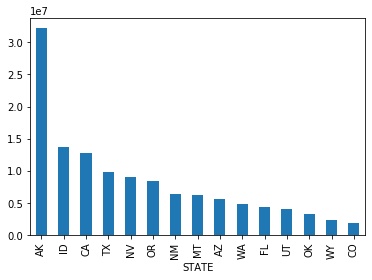

In [9]:
df["TOTAL_FIRE_SIZE"].sort_values(ascending=False)[:15].plot(kind="bar");

After sorting the data, we can clearly see that Arkansas is the most prone to fires. 

However, let's now sort this data in accordance to the number of incidents in which fires have occurred in each respective state. 

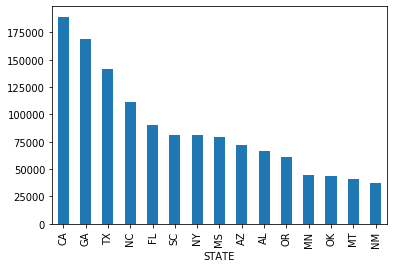

In [10]:
df = pd.read_sql_query("SELECT COUNT(OBJECTID) AS COUNT_INCIDENTS, State FROM Fires GROUP BY State;", conn)
df.set_index("STATE")["COUNT_INCIDENTS"].sort_values(ascending=False)[:15].plot(kind="bar");

With this visualization, we can clearly see that although __Arkansas__ contains the largest number of acres burned down in a wildfire, __California__ contains the most incidents of wildfires. 

#### __What are the trends occurring annually?__

Here, we are grouping the incidents by year. 

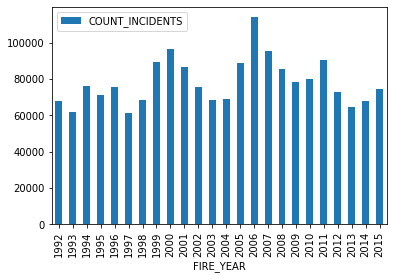

In [11]:
df = pd.read_sql_query("SELECT COUNT(OBJECTID) AS COUNT_INCIDENTS, FIRE_YEAR FROM Fires GROUP BY FIRE_YEAR;", conn)
df.set_index("FIRE_YEAR").plot(kind="bar");

As you can see, __2006__ contains the most incidents of wildfires. 

Next, we are grouping the data by total fire size. 

The mean acres burned down across all years is a whopping __78,352 acres__. 

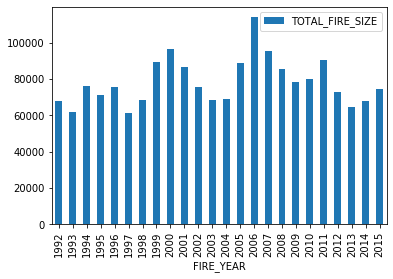

In [12]:
df = pd.read_sql_query("SELECT COUNT(OBJECTID) AS TOTAL_FIRE_SIZE, FIRE_YEAR FROM Fires GROUP BY FIRE_YEAR;", conn)
df.set_index("FIRE_YEAR").plot(kind="bar");

We can once again see that __2006__ contains the largest total acres burned down in comparison to the other years. 

#### __Analyzing Wildfires by Season__

Here, we are analyzing the attributes of the fires by season. 

As a result, the data is binned in accordance to days in a year. 

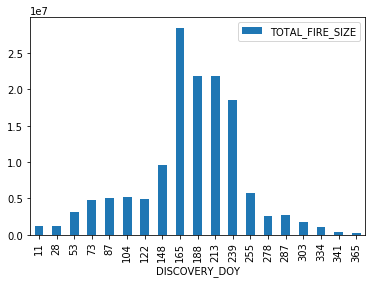

In [13]:
df = pd.read_sql_query(
    "SELECT SUM(FIRE_SIZE) AS TOTAL_FIRE_SIZE, DISCOVERY_DOY FROM Fires GROUP BY DISCOVERY_DOY/20;", 
    conn
)
df.set_index("DISCOVERY_DOY").plot.bar();

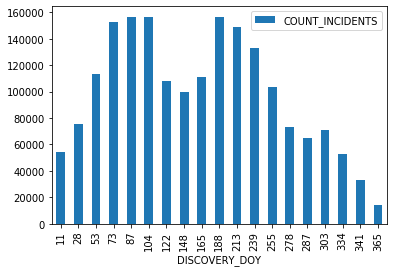

In [14]:
df = pd.read_sql_query(
    "SELECT COUNT(OBJECTID) AS COUNT_INCIDENTS, DISCOVERY_DOY FROM Fires GROUP BY DISCOVERY_DOY/20;", 
    conn
)
df.set_index("DISCOVERY_DOY").plot(kind="bar");

This shows that number of incidents drops unexpectedly around day 152 in an average year, while the most fires are discovered around day 171 or later.

### What is the dataset, __"NIFC Wildland Fires"__ about?

Titled "NIFC Wildland Fires" this dataset is scraped from the National Intragency Fire Center's webpage. This dataset contains a record of the wildland fires that exceeded 100,000 acres in the United States. 

Here is the webpage for the dataset: [NIFC Data](https://www.nifc.gov/fireInfo/fireInfo_stats_lgFires.html)

We will import the libraries for the cleaning and analysis procedures. 

In [15]:
# LIBRARIES 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Creating a dataframe for the NIFC CSV file. 

In [16]:
%matplotlib inline

import pandas as pd
pd.options.display.max_rows = 5
nifc_df = pd.read_csv("NIFCWildlandFires.csv")
nifc_df

,Year,Fire Name,State,Total Acres
0,2004,Taylor Complex,AK,"1,305,592"
1,2006,East Amarillo Complex,TX,"907,245"
...,...,...,...,...
177,2000,Maudlow/Toston,MT,"100,000"
178,2002,Vinasale,AK,"100,000"


In [17]:
nifc_df.describe()

,Year,Fire Name,State,Total Acres
count,179,179,179,179
unique,31,178,20,173
top,2006,Sheep,AK,"100,000"
freq,17,2,45,3


First, let's clean the __Total Acres__ column to ensure that all values are numeric. 

In [18]:
# REMOVING THE COMMA
nifc_df['Total Acres'] = nifc_df['Total Acres'].str.replace(',', '')
# CASTING TO FLOAT
nifc_df['Total Acres'] = nifc_df['Total Acres'].astype(float)

# DISPLAYING NEW DATAFRAME
nifc_df

,Year,Fire Name,State,Total Acres
0,2004,Taylor Complex,AK,1305592.0
1,2006,East Amarillo Complex,TX,907245.0
...,...,...,...,...
177,2000,Maudlow/Toston,MT,100000.0
178,2002,Vinasale,AK,100000.0


#### __Are there any missing values?__

Here, we are checking for missing values in our code. 

In [19]:
(nifc_df.astype(np.object) == '?').any()

Year           False
Fire Name      False
State          False
Total Acres    False
dtype: bool

Here, we are checking for NaN values in our data. 

In [20]:
(nifc_df.astype(np.object) == 'NaN').any()

Year           False
Fire Name      False
State          False
Total Acres    False
dtype: bool

Here, we are checking for '0' values. 

In [21]:
(nifc_df.astype(np.object) == 0).any()

Year           False
Fire Name      False
State          False
Total Acres    False
dtype: bool

#### __Aggregating Categorical Variables__

In [22]:
nifc_df['Year'].value_counts()

2006     17
2007     13
         ..
1,999     1
2,004     1
Name: Year, Length: 31, dtype: int64

In [23]:
nifc_df['State'].value_counts()

AK    45
ID    23
      ..
WY     1
SD     1
Name: State, Length: 20, dtype: int64

By aggregating the Year and State variables, we can see that __2006__ contains the most wildfire occurrences and __Arkansas__ contains the most wildfire occurrences. 

#### __Visualizations__

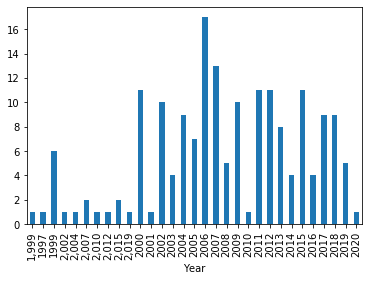

In [27]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

nifc_df.groupby(nifc_df['Year'])
nifc_df.groupby('Year')['Total Acres'].nunique().plot(kind='bar')
plt.show()

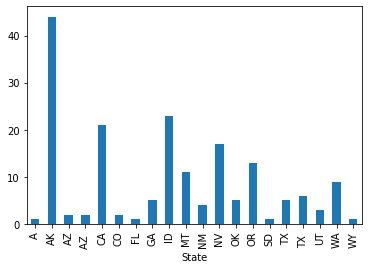

In [28]:
nifc_df.groupby(nifc_df['Year'])
nifc_df.groupby('State')['Total Acres'].nunique().plot(kind='bar')
plt.show()

By creating visualizations for the Year and State variables, we can see that __2006__ contains the most wildfire occurrences and __Arkansas__ contains the most wildfire occurrences. 

IndexError: list index out of range

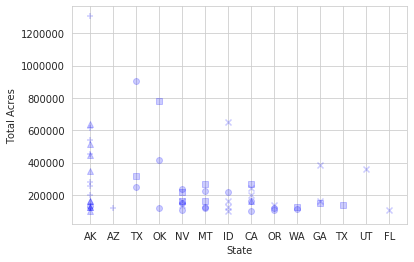

In [37]:
def plot_scatter_shape(nifc_data, cols, shape_col = 'Year', col_y = 'Total Acres', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = nifc_data[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = nifc_data[nifc_data[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
num_cols = ['State', 'Year']
plot_scatter_shape(nifc_df, num_cols)

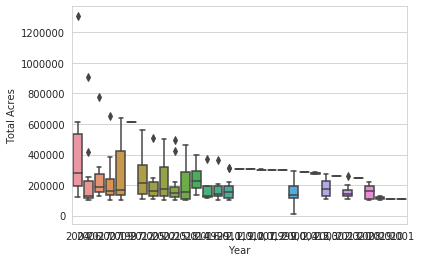

In [43]:
def plot_box(nifc_data, col, col_y = 'Total Acres'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=nifc_df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(nifc_df, 'Year')

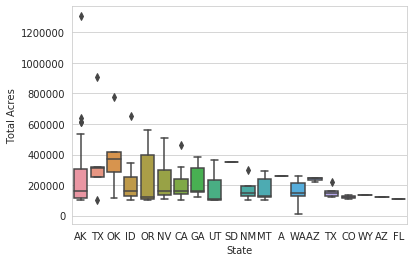

In [44]:
def plot_box(nifc_data, col, col_y = 'Total Acres'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=nifc_df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(nifc_df, 'State')

The visualizations thus depict in a clearer fashion the total acres affected for each year and state. 